# 🏡 Nom du Dataset : California Housing Dataset

## **AYA CHEMMAKHA**
## **IA102**

# Bibliothèques pour la manipulation des données

In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')


# ***PARTIE 1:***

## 🏠 Description des colonnes – California Housing Dataset

| 🏷️ Colonne        | 📘 Description |
|-------------------|----------------|
| **MedInc**        | Revenu médian des ménages dans le quartier *(en dizaines de milliers de dollars)*. Exemple : `8.3252` → **83 252 $**. |
| **HouseAge**      | Âge médian des maisons dans le quartier *(en années)*. Exemple : `41.0` → maisons plutôt anciennes. |
| **AveRooms**      | Nombre moyen de **pièces** par logement (chambres + salon + cuisine, etc.). |
| **AveBedrms**     | Nombre moyen de **chambres à coucher** par logement. |
| **Population**    | Nombre total d’habitants dans le quartier. |
| **AveOccup**      | Nombre moyen de personnes **par logement**. Exemple : `2.5` → chaque logement est occupé en moyenne par 2.5 personnes. |
| **Latitude**      | Latitude géographique du quartier. Permet de situer le quartier sur la carte (axe nord-sud). |
| **Longitude**     | Longitude géographique du quartier. Permet de situer le quartier sur la carte (axe est-ouest). |
| **MedHouseVal**   | 🎯 **Variable cible** : valeur médiane des maisons *(en centaines de milliers de dollars)*. Exemple : `4.526` → **452 600 $**. |


# Charger les données

In [ ]:
from sklearn.datasets import fetch_california_housing
import pandas as pd

data = fetch_california_housing(as_frame=True)
df = data.frame
df

In [ ]:
df.shape

In [ ]:
df.dtypes

In [ ]:
df.describe()

# ✅ 2. Prétraitement des données (Data Cleaning)


## **Valeurs manquantes :**


In [ ]:
df.isna().sum()

In [ ]:
df.duplicated().sum()

In [ ]:
df.select_dtypes(exclude=['object'])

In [ ]:
from scipy import stats

def detect_outliers(df, column):
    z_scores = stats.zscore(df[column])
    threshold = 3
    outliers = df[np.abs(z_scores) > threshold][column]
    return outliers

def remove_outliers(df, column):
    z_scores = stats.zscore(df[column])
    threshold = 3
    new_df = df[np.abs(z_scores) < threshold]
    return new_df


In [ ]:
for i in df.select_dtypes(exclude=['object']) :
    print(f"Colonne {i}: {detect_outliers(df, i).count()}")

In [ ]:
plt.figure(figsize=(30, 5))  # Ajuste la taille du graphique

for i, col in enumerate(df.select_dtypes(include='number').columns, 1,):
    plt.subplot(1, len(df.columns), i)  # Crée des sous-graphiques côte à côte
    sns.boxplot(y=df[col])
    plt.title(col)

plt.tight_layout()  # Ajuste les espacements
plt.show()

## pour la Colonne MedInc


In [ ]:
Q1 = df['MedInc'].quantile(0.25)  
Q3 = df['MedInc'].quantile(0.75)  
IQR = Q3 - Q1  
lower_bound = Q1 - 1.5 * IQR  
upper_bound = Q3 + 1.5 * IQR  

In [ ]:
df.shape

In [ ]:
df['MedInc'].describe()

In [ ]:
df.drop(df[df['MedInc']<=lower_bound].index, inplace=True)
df.drop(df[df['MedInc']>=upper_bound].index, inplace=True)

In [ ]:
df['MedInc'].describe()

In [ ]:
df.shape

## pour la colonnes AveRooms

In [ ]:
df['AveRooms'].describe()

In [ ]:
Q1 = df['AveRooms'].quantile(0.25)  
Q3 = df['AveRooms'].quantile(0.75)  
IQR = Q3 - Q1  
lower_bound = Q1 - 1.5 * IQR  
upper_bound = Q3 + 1.5 * IQR  


df.drop(df[df['AveRooms']<=lower_bound].index, inplace=True)
df.drop(df[df['AveRooms']>=upper_bound].index, inplace=True)

In [ ]:
df['AveRooms'].describe()

## pour la colonnes AveBedrms:

In [ ]:
df['AveBedrms'].describe()

In [ ]:
Q1 = df['AveBedrms'].quantile(0.25)  
Q3 = df['AveBedrms'].quantile(0.75)  
IQR = Q3 - Q1  
lower_bound = Q1 - 1.5 * IQR  
upper_bound = Q3 + 1.5 * IQR  


df.drop(df[df['AveBedrms']<=lower_bound].index, inplace=True)
df.drop(df[df['AveBedrms']>=upper_bound].index, inplace=True)

In [ ]:
df['AveBedrms'].describe()

## pour la colonne Population

In [ ]:
df['Population'].describe()


In [ ]:
Q1 = df['Population'].quantile(0.25)  
Q3 = df['Population'].quantile(0.75)  
IQR = Q3 - Q1  
lower_bound = Q1 - 1.5 * IQR  
upper_bound = Q3 + 1.5 * IQR  


df.drop(df[df['Population']<=lower_bound].index, inplace=True)
df.drop(df[df['Population']>=upper_bound].index, inplace=True)

In [ ]:
df['Population'].describe()

## pour la Colonne AveOccup


In [ ]:
df['AveOccup'].describe()

In [ ]:
Q1 = df['AveOccup'].quantile(0.25)  
Q3 = df['AveOccup'].quantile(0.75)  
IQR = Q3 - Q1  
lower_bound = Q1 - 1.5 * IQR  
upper_bound = Q3 + 1.5 * IQR  


df.drop(df[df['AveOccup']<=lower_bound].index, inplace=True)
df.drop(df[df['AveOccup']>=upper_bound].index, inplace=True)

In [ ]:
df['AveOccup'].describe()

In [ ]:
for i in df.select_dtypes(exclude=['object']) :
    print(f"Colonne {i}: {detect_outliers(df, i).count()}")

In [ ]:
plt.figure(figsize=(30, 10))  # Ajuste la taille du graphique

for i, col in enumerate(df.select_dtypes(include='number').columns, 1,):
    plt.subplot(1, len(df.columns), i)  # Crée des sous-graphiques côte à côte
    sns.boxplot(y=df[col])
    plt.title(col)

plt.tight_layout()  # Ajuste les espacements
plt.show()

In [ ]:
df.hist(edgecolor='pink', alpha=0.7 , figsize=(20,15))
plt.show()

## ***. ENCODING : Nettoyage des chaînes de caractères***

In [ ]:
df.select_dtypes(include=['object'])

# ✅ 3. Normalisation / Standardisation

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df.drop("MedHouseVal", axis=1))


# ✅ 4. Exploration des données (EDA)

In [ ]:
df.hist(bins=30, figsize=(12,10))

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title("Matrice de corrélation", fontsize=16)
plt.show()

In [ ]:
sns.boxplot(x='MedHouseVal', data=df)
sns.pairplot(df)


In [ ]:
plt.figure(figsize=(10, 5))
sns.histplot(df['Population'], kde=True, color='purple')
plt.title("Distribution de la population par quartier")
plt.xlabel("Population")
plt.ylabel("Densité")
plt.show()

### Répartition géographique des maisons en Californie

In [ ]:
print(df['Longitude'].min(), df['Longitude'].max())


In [ ]:
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df, x='Longitude', y='Latitude', hue='MedHouseVal', palette='viridis', alpha=0.6)
plt.title("Répartition géographique des maisons en Californie", fontsize=15)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend(title='Valeur Maison')
plt.show()


# ***Partie 2  : modele machine learning :***

In [ ]:
df 

# 📊 l'objectif est  prédire la valeur médiane des maisons (MedHouseVal) en fonction des caractéristiques des quartiers 

# **modèle de régression linéaire**


## Séparation des variables (X et y)




In [ ]:
X = df.drop(columns='MedHouseVal')
y = df['MedHouseVal']


## Division en jeu d'entraînement/test

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Création et entraînement du modèle

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

In [ ]:
# 4. Prédictions
y_pred = model.predict(X_test)

## Évaluation du modèle

In [ ]:
print("Coefficients :", model.coef_)
print("Intercept :", model.intercept_)
print("MSE :", mean_squared_error(y_test, y_pred))
print("R² Score :", r2_score(y_test, y_pred))


## Affichage des résultats

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color='teal')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Valeurs réelles")
plt.ylabel("Valeurs prédites")
plt.title("Régression linéaire : Réel vs Prédit")
plt.grid(True)
plt.show()

In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, X_scaled, y, cv=5, scoring='r2')
print("R² moyen en validation croisée :", scores.mean())


<div style="text-align: center;">
    <h2>K-Nearest Neighbors</h2>
</div>

In [ ]:
X = df.drop(columns='MedHouseVal')
y = df['MedHouseVal']

# 2. Standardisation (obligatoire pour KNN)


In [ ]:

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [ ]:
knn = KNeighborsRegressor(n_neighbors=5)  # Tu peux tester d'autres valeurs de k (3, 7, 10...)
knn.fit(X_train, y_train)

In [ ]:
y_pred = knn.predict(X_test)
print("📉 MSE :", mean_squared_error(y_test, y_pred))
print("📈 R² Score :", r2_score(y_test, y_pred))

In [ ]:
for k in range(1, 21):
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train, y_train)
    print(f"k={k} → R² = {knn.score(X_test, y_test):.4f}")


<div style="text-align: center;">
    <h2>Decision Tree</h2>
</div>

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Préparation des données
X = df.drop(columns='MedHouseVal')
y = df['MedHouseVal']

# Optionnel mais recommandé : standardisation
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split train/test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Créer et entraîner l’arbre
tree = DecisionTreeRegressor(max_depth=10, random_state=42)
tree.fit(X_train, y_train)

# Prédictions
y_pred = tree.predict(X_test)

# Évaluation
print("📉 MSE :", mean_squared_error(y_test, y_pred))
print("📈 R² Score :", r2_score(y_test, y_pred))


In [ ]:
for d in range(2, 10):
    tree = DecisionTreeRegressor(max_depth=d, random_state=42)
    tree.fit(X_train, y_train)
    r2 = tree.score(X_test, y_test)
    print(f"max_depth={d} → R² = {r2:.4f}")


In [ ]:
print("📉 MSE :", mean_squared_error(y_test, y_pred))
print("📈 R² Score :", r2_score(y_test, y_pred))

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))
plot_tree(tree, feature_names=df.columns[:-1], filled=True, max_depth=2)  # max_depth limité pour lisibilité
plt.show()


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# 1. Séparer les données
X = df.drop(columns='MedHouseVal')
y = df['MedHouseVal']

# 2. Standardisation (pas obligatoire pour Random Forest, mais utile si comparé à d'autres modèles)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. Split train/test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 4. Créer et entraîner le modèle
rf = RandomForestRegressor(n_estimators=100, max_depth=None, random_state=42)
rf.fit(X_train, y_train)

# 5. Prédictions
y_pred = rf.predict(X_test)

# 6. Évaluation
print("📉 MSE :", mean_squared_error(y_test, y_pred))
print("📈 R² Score :", r2_score(y_test, y_pred))


<div style="text-align: center;">
    <h2>SVM: Support Vector Machine</h2>
</div>

In [ ]:
X = df.drop(columns='MedHouseVal')  # Toutes les colonnes sauf 'MedHouseVal'
y = df['MedHouseVal']  # La colonne cible 'MedHouseVal'

# 1. Standardisation des données
scaler_X = StandardScaler()  # Pour normaliser les features
scaler_y = StandardScaler()  # Pour normaliser la variable cible

X_scaled = scaler_X.fit_transform(X)  # Normalisation des caractéristiques
y_scaled = scaler_y.fit_transform(y.values.reshape(-1, 1)).flatten()  # Normalisation de la cible

# 2. Diviser les données en ensembles d'entraînement et de test (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)

# 3. Création et entraînement du modèle SVM (SVR)
svm_regressor = SVR(kernel='rbf', C=100, epsilon=0.1)  # Paramètres à ajuster : 'rbf' pour noyau radial
svm_regressor.fit(X_train, y_train)

# 4. Prédictions sur les données de test
y_pred = svm_regressor.predict(X_test)


# 6. Évaluation du modèle
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("📉 Mean Squared Error (MSE) :", mse)
print("📈 R² Score :", r2)

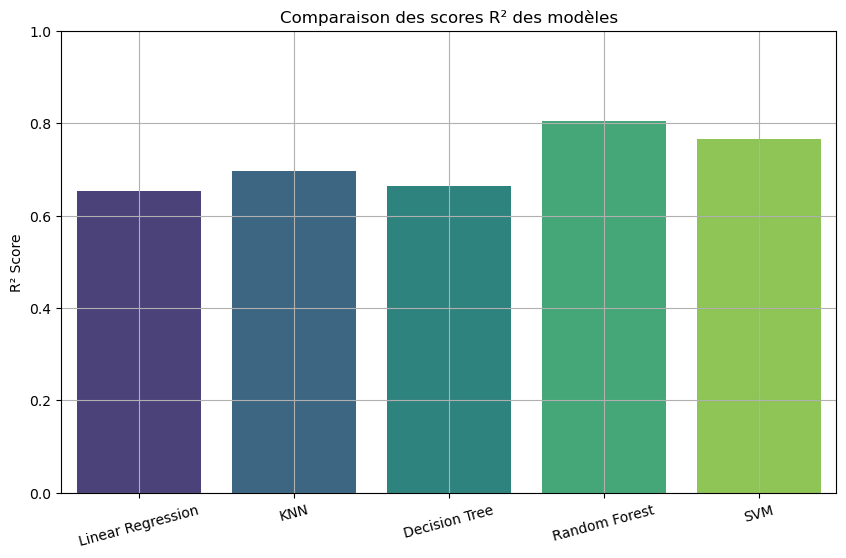

In [61]:
models = {
    "Linear Regression": LinearRegression(),
    "KNN": KNeighborsRegressor(n_neighbors=13),
    "Decision Tree": DecisionTreeRegressor(max_depth=8),
    "Random Forest": RandomForestRegressor(n_estimators=100),
    "SVM": SVR(kernel='rbf', C=100, epsilon=0.1)
}

results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    results[name] = r2_score(y_test, y_pred)

# Affichage
plt.figure(figsize=(10, 6))
sns.barplot(x=list(results.keys()), y=list(results.values()), palette='viridis')
plt.title("Comparaison des scores R² des modèles")
plt.ylabel("R² Score")
plt.xticks(rotation=15)
plt.ylim(0, 1)
plt.grid(True)
plt.show()

In [ ]:
import joblib
joblib.dump(rf, 'random_forest_model.pkl')

['random_forest_model.pkl']